## PROYECTO MACHINE LEARNING
#### NFL ODDS PREDICTION

In [ ]:
from utils.libreries import *

In [9]:
file_path = "data/raw/spreadspoke_scores.csv"

#Hacemos la llamada a nuestro DF
scores = pd.read_csv(file_path)
scores.head(5)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [10]:
scores.describe().T

,count,mean,std,min,25%,50%,75%,max
schedule_season,13516.0,1996.082939,16.144258,1966.0,1983.0,1997.0,2010.0,2022.0
score_home,13516.0,22.461897,10.526423,0.0,15.0,22.0,29.0,72.0
score_away,13516.0,19.784848,10.165222,0.0,13.0,20.0,27.0,62.0
spread_favorite,11037.0,-5.385204,3.439617,-26.5,-7.0,-4.5,-3.0,0.0
weather_temperature,12309.0,58.833211,15.538656,-6.0,48.0,62.0,72.0,97.0
weather_wind_mph,12293.0,7.689010,5.694124,0.0,3.0,8.0,11.0,40.0
weather_humidity,8468.0,67.212801,15.796414,4.0,57.0,69.0,79.0,100.0


In [11]:
scores.isnull().sum()

schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home                  0
score_home                 0
score_away                 0
team_away                  0
team_favorite_id        2479
spread_favorite         2479
over_under_line         2489
stadium                    0
stadium_neutral            0
weather_temperature     1207
weather_wind_mph        1223
weather_humidity        5048
weather_detail         10597
dtype: int64

In [12]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13516 entries, 0 to 13515
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13516 non-null  object 
 1   schedule_season      13516 non-null  int64  
 2   schedule_week        13516 non-null  object 
 3   schedule_playoff     13516 non-null  bool   
 4   team_home            13516 non-null  object 
 5   score_home           13516 non-null  int64  
 6   score_away           13516 non-null  int64  
 7   team_away            13516 non-null  object 
 8   team_favorite_id     11037 non-null  object 
 9   spread_favorite      11037 non-null  float64
 10  over_under_line      11027 non-null  object 
 11  stadium              13516 non-null  object 
 12  stadium_neutral      13516 non-null  bool   
 13  weather_temperature  12309 non-null  float64
 14  weather_wind_mph     12293 non-null  float64
 15  weather_humidity     8468 non-null  

### DATA PROCESSING

Después de cargar nuestros datos en crudo procedemos a trabajar sobre ellos.

In [13]:
#Nos quedamos solo con la temporada regular. Procedemos a eliminar los playoffs
scores = scores[scores['schedule_playoff'] == 0]
scores = scores.loc[scores['schedule_season'] >= 1980]

In [14]:
#Establecemos como punto de partida la temporada 1980.
# scores = scores.loc[scores['schedule_season'] >= 1980]

In [15]:
#Cambiamos el formato de las columnas para que sean numéricas
scores = scores.astype({'schedule_playoff': int,
                        'schedule_week': int,
                        'over_under_line': float
                        })

In [16]:
#Eliminamos los NANs de las columnas debido su antiguedad y que pueden ser irrelevantes
scores.isnull().sum()

schedule_date             0
schedule_season           0
schedule_week             0
schedule_playoff          0
team_home                 0
score_home                0
score_away                0
team_away                 0
team_favorite_id          0
spread_favorite           0
over_under_line           0
stadium                   0
stadium_neutral           0
weather_temperature     692
weather_wind_mph        691
weather_humidity       4188
weather_detail         7690
dtype: int64

In [17]:
# Eliminamos las columnas que no nos interesan debido a alto numero de NANs "weather_detail", "weather_humidity"
# Eliminamos la columna "schedule_playoff" que no nos interesa 

scores = scores.drop(columns=["schedule_playoff","weather_detail", "stadium_neutral"])

In [18]:
#Tratamos los Nans de nuestras columnas. Para la columna "weather_temperature" utizamos media al ser simitrica su distrubucion.
# Para la columna "weather_humidity" la media debido a que tiende a ser una distrubucion logaritmica.
scores = scores.fillna({'weather_temperature': scores['weather_temperature'].median(),
                        'weather_wind_mph': (scores['weather_wind_mph'].median())})


In [19]:
scores = scores.reset_index(drop=True)

### FEATURES

In [20]:
# Calcula la diferencia de puntajes entre el equipo local y visitante
scores['score_diff'] = scores['score_home'] - scores['score_away']

In [21]:
scores["result"] = (scores["score_home"] >= scores["score_away"]).astype(int)

In [22]:
scores['total_points'] = scores['score_home'] + scores['score_away']

In [23]:
# #Creamos nuestro target llamado "winner"
# def calcular_ganador(row):
#     if row['score_home'] > row['score_away']:
#         return 1
#     elif row['score_home'] < row['score_away']:
#         return 0
#     else:
#         return "tie"

# # Creamos la nueva columna "winner" que será nuestro target
# scores['winner'] = scores.apply(calcular_ganador, axis=1)


In [24]:
#Buscamos un resultado de victoria y vemos que desde 1980 en temporada regular solo han habido 26 empates procedemos a eliminarlo.
# scores["winner"].value_counts()

In [25]:
# scores = scores[scores['winner'] != "tie"]

In [26]:
scores["result"] = (scores["score_home"] >= scores["score_away"]).astype(int)

In [27]:
# scores = scores.astype({
#                         "team_home":"category",
#                         "team_away":"category",
#                         "team_favorite_id":"category",
#                         "stadium":"category",
#                         })

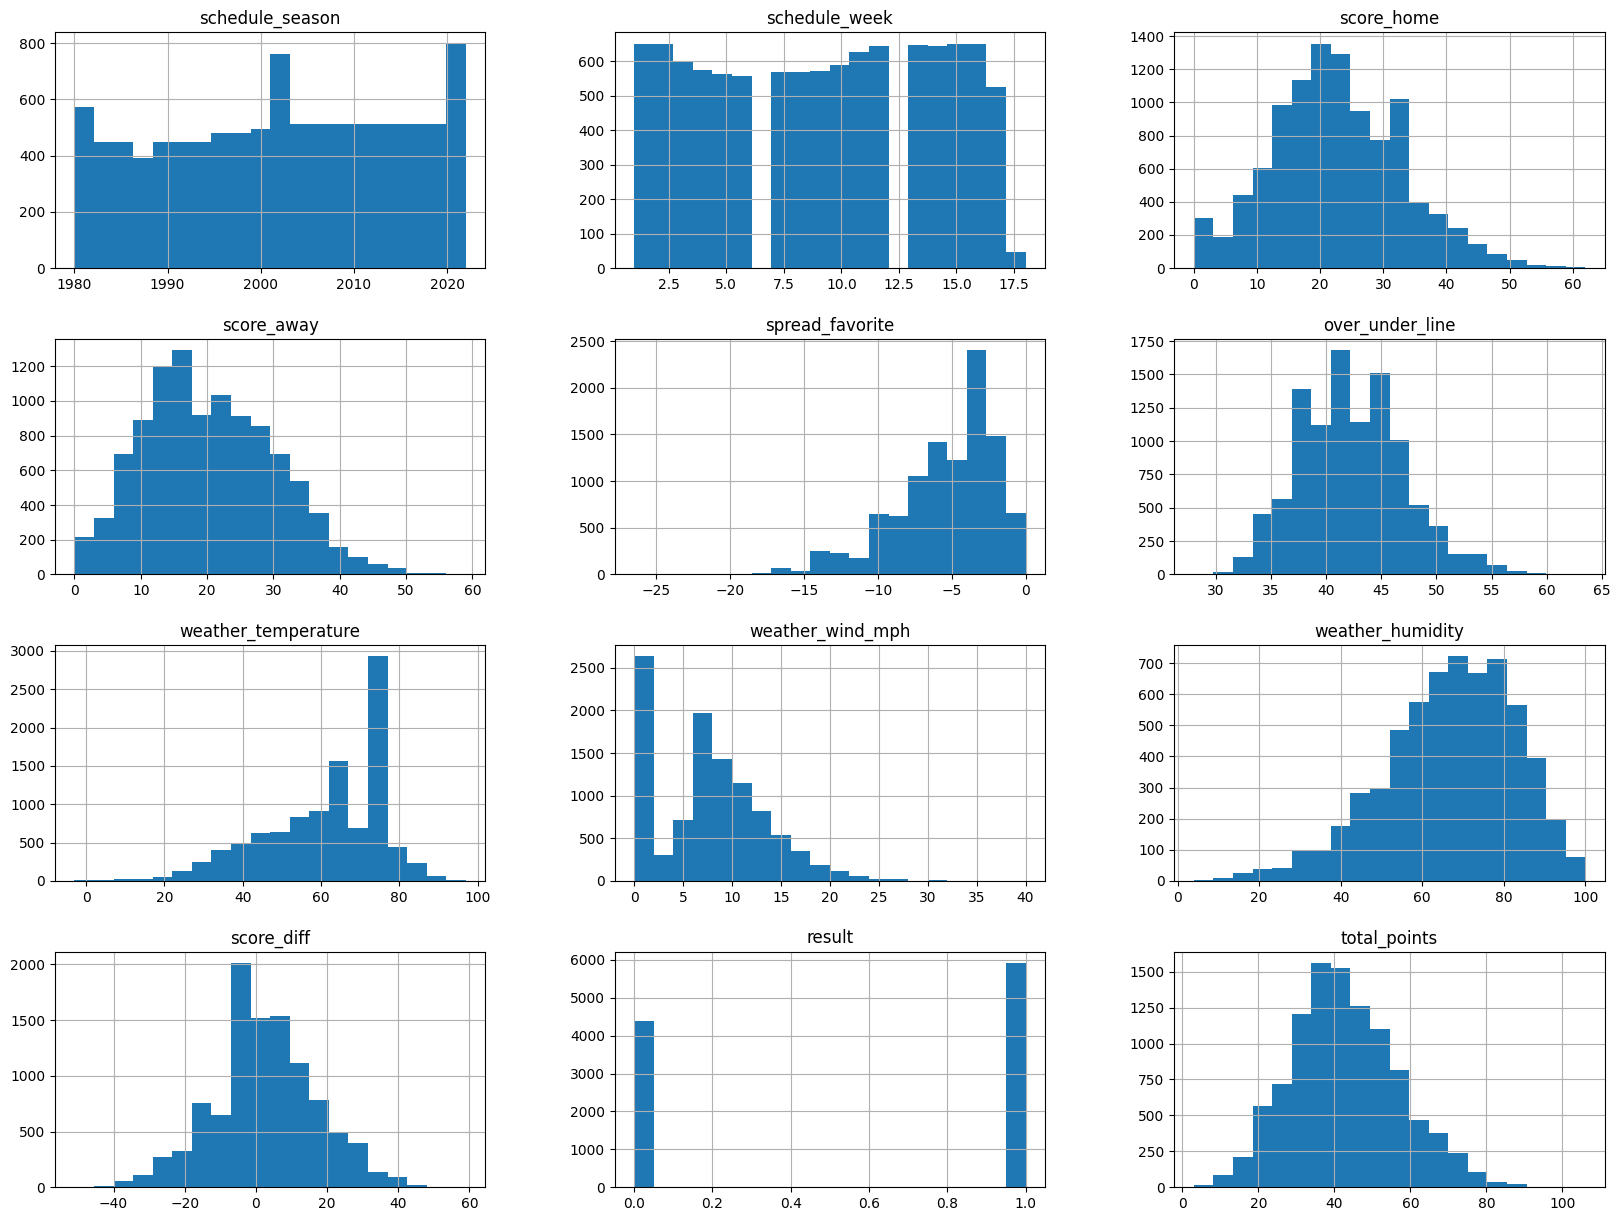

In [28]:
scores.hist(bins=20, figsize=(20,15));

In [29]:
scores["team_favorite_id"] = scores.team_favorite_id.replace("PICK", np.nan).dropna()

In [30]:
scores.team_home.replace({"Washington Redskins":"WAS",
                                 "Washington Football Team":"WAS",
                                 "Washington Commanders":"WAS",
                                 "San Diego Chargers":"LAC",
                                 "Los Angeles Chargers":"LAC",
                                 "Los Angeles Raiders":"LVR",
                                 "Las Vegas Raiders":"LVR",
                                 "Oakland Raiders":"LVR",
                                 "Tennessee Oilers":"TEN",
                                 "Houston Oilers": "TEN",
                                 "Tennessee Titans":"TEN",
                                 "Phoenix Cardinals":"LAR",
                                 "St. Louis Rams":"LAR",
                                 "Los Angeles Rams":"LAR",
                                 "St. Louis Cardinals": "ARI",
                                 "Arizona Cardinals":"ARI",
                                 "Baltimore Colts":"IND",
                                 "Indianapolis Colts":"IND",
                                 "Houston Texans":"HOU",
                                 "Baltimore Ravens":"BAL",
                                 "Carolina Panthers":"CAR",
                                 "Jacksonville Jaguars":"JAX",
                                 "Cleveland Browns":"CLE",
                                 "Cincinnati Bengals":"CIN",
                                 "Chicago Bears":"CHI",
                                 "Dallas Cowboys":"DAL",
                                 "Detroit Lions":"DET",
                                 "Green Bay Packers":"GB",
                                 "Kansas City Chiefs":"KC",
                                 "Miami Dolphins":"MIA",
                                 "Pittsburgh Steelers":"PIT",
                                 "Tampa Bay Buccaneers":"TB",
                                 "New York Jets":"NYJ",
                                 "Atlanta Falcons":"ATL",
                                 "New Orleans Saints":"NO",
                                 "New England Patriots":"NE",
                                 "Denver Broncos":"DEN",
                                 "San Francisco 49ers":"SF",
                                 "Seattle Seahawks":"SEA",
                                 "Buffalo Bills":"BUF",
                                 "New York Giants":"NYG",
                                 "Minnesota Vikings":"MIN",
                                 "Philadelphia Eagles":"PHI"}, inplace=True)

In [31]:
scores.team_away.replace({"Washington Redskins":"WAS",
                                 "Washington Football Team":"WAS",
                                 "Washington Commanders":"WAS",
                                 "San Diego Chargers":"LAC",
                                 "Los Angeles Chargers":"LAC",
                                 "Los Angeles Raiders":"LVR",
                                 "Las Vegas Raiders":"LVR",
                                 "Oakland Raiders":"LVR",
                                 "Tennessee Oilers":"TEN",
                                 "Houston Oilers": "TEN",
                                 "Tennessee Titans":"TEN",
                                 "Phoenix Cardinals":"LAR",
                                 "St. Louis Rams":"LAR",
                                 "Los Angeles Rams":"LAR",
                                 "St. Louis Cardinals": "ARI",
                                 "Arizona Cardinals":"ARI",
                                 "Baltimore Colts":"IND",
                                 "Indianapolis Colts":"IND",
                                 "Houston Texans":"HOU",
                                 "Baltimore Ravens":"BAL",
                                 "Carolina Panthers":"CAR",
                                 "Jacksonville Jaguars":"JAX",
                                 "Cleveland Browns":"CLE",
                                 "Cincinnati Bengals":"CIN",
                                 "Chicago Bears":"CHI",
                                 "Dallas Cowboys":"DAL",
                                 "Detroit Lions":"DET",
                                 "Green Bay Packers":"GB",
                                 "Kansas City Chiefs":"KC",
                                 "Miami Dolphins":"MIA",
                                 "Pittsburgh Steelers":"PIT",
                                 "Tampa Bay Buccaneers":"TB",
                                 "New York Jets":"NYJ",
                                 "Atlanta Falcons":"ATL",
                                 "New Orleans Saints":"NO",
                                 "New England Patriots":"NE",
                                 "Denver Broncos":"DEN",
                                 "San Francisco 49ers":"SF",
                                 "Seattle Seahawks":"SEA",
                                 "Buffalo Bills":"BUF",
                                 "New York Giants":"NYG",
                                 "Minnesota Vikings":"MIN",
                                 "Philadelphia Eagles":"PHI"}, inplace=True)

In [32]:
# from sklearn.preprocessing import LabelEncoder

# # Supongamos que tienes un DataFrame llamado "scores" con una columna llamada "stadium" que contiene los nombres de los estadios

# # Extrae la columna "stadium" del DataFrame
# stadiums = scores['stadium']

# # Crea una instancia del LabelEncoder
# encoder = LabelEncoder()

# # Ajusta y transforma los datos de los estadios utilizando el LabelEncoder
# stadiums_encoded = encoder.fit_transform(stadiums)

# # Asigna los datos codificados a una nueva columna "stadium_encoded" en el DataFrame
# scores['stadium_encoded'] = stadiums_encoded


In [33]:
fav_home = scores['team_home']

# Crea una instancia del LabelEncoder
encoder = LabelEncoder()

# Ajusta y transforma los datos de los estadios utilizando el LabelEncoder
fav_home = encoder.fit_transform(fav_home)

# Asigna los datos codificados a una nueva columna "stadium_encoded" en el DataFrame
scores['team_home_encoded'] = fav_home

In [34]:
fav_away = scores['team_away']

# Crea una instancia del LabelEncoder
encoder = LabelEncoder()

# Ajusta y transforma los datos de los estadios utilizando el LabelEncoder
fav_away = encoder.fit_transform(fav_away)

# Asigna los datos codificados a una nueva columna "stadium_encoded" en el DataFrame
scores['team_away_encoded'] = fav_away

In [35]:
favs = scores['team_favorite_id']

# Crea una instancia del LabelEncoder
encoder = LabelEncoder()

# Ajusta y transforma los datos de los estadios utilizando el LabelEncoder
team_favorite_id_encoded = encoder.fit_transform(favs)

# Asigna los datos codificados a una nueva columna "stadium_encoded" en el DataFrame
scores['team_favorite_id_encoded'] = team_favorite_id_encoded

In [36]:
scores = scores.fillna(0)
scores.schedule_season = scores.schedule_season-2000
scores['weather_humidity'] = pd.to_numeric(scores['weather_humidity'])

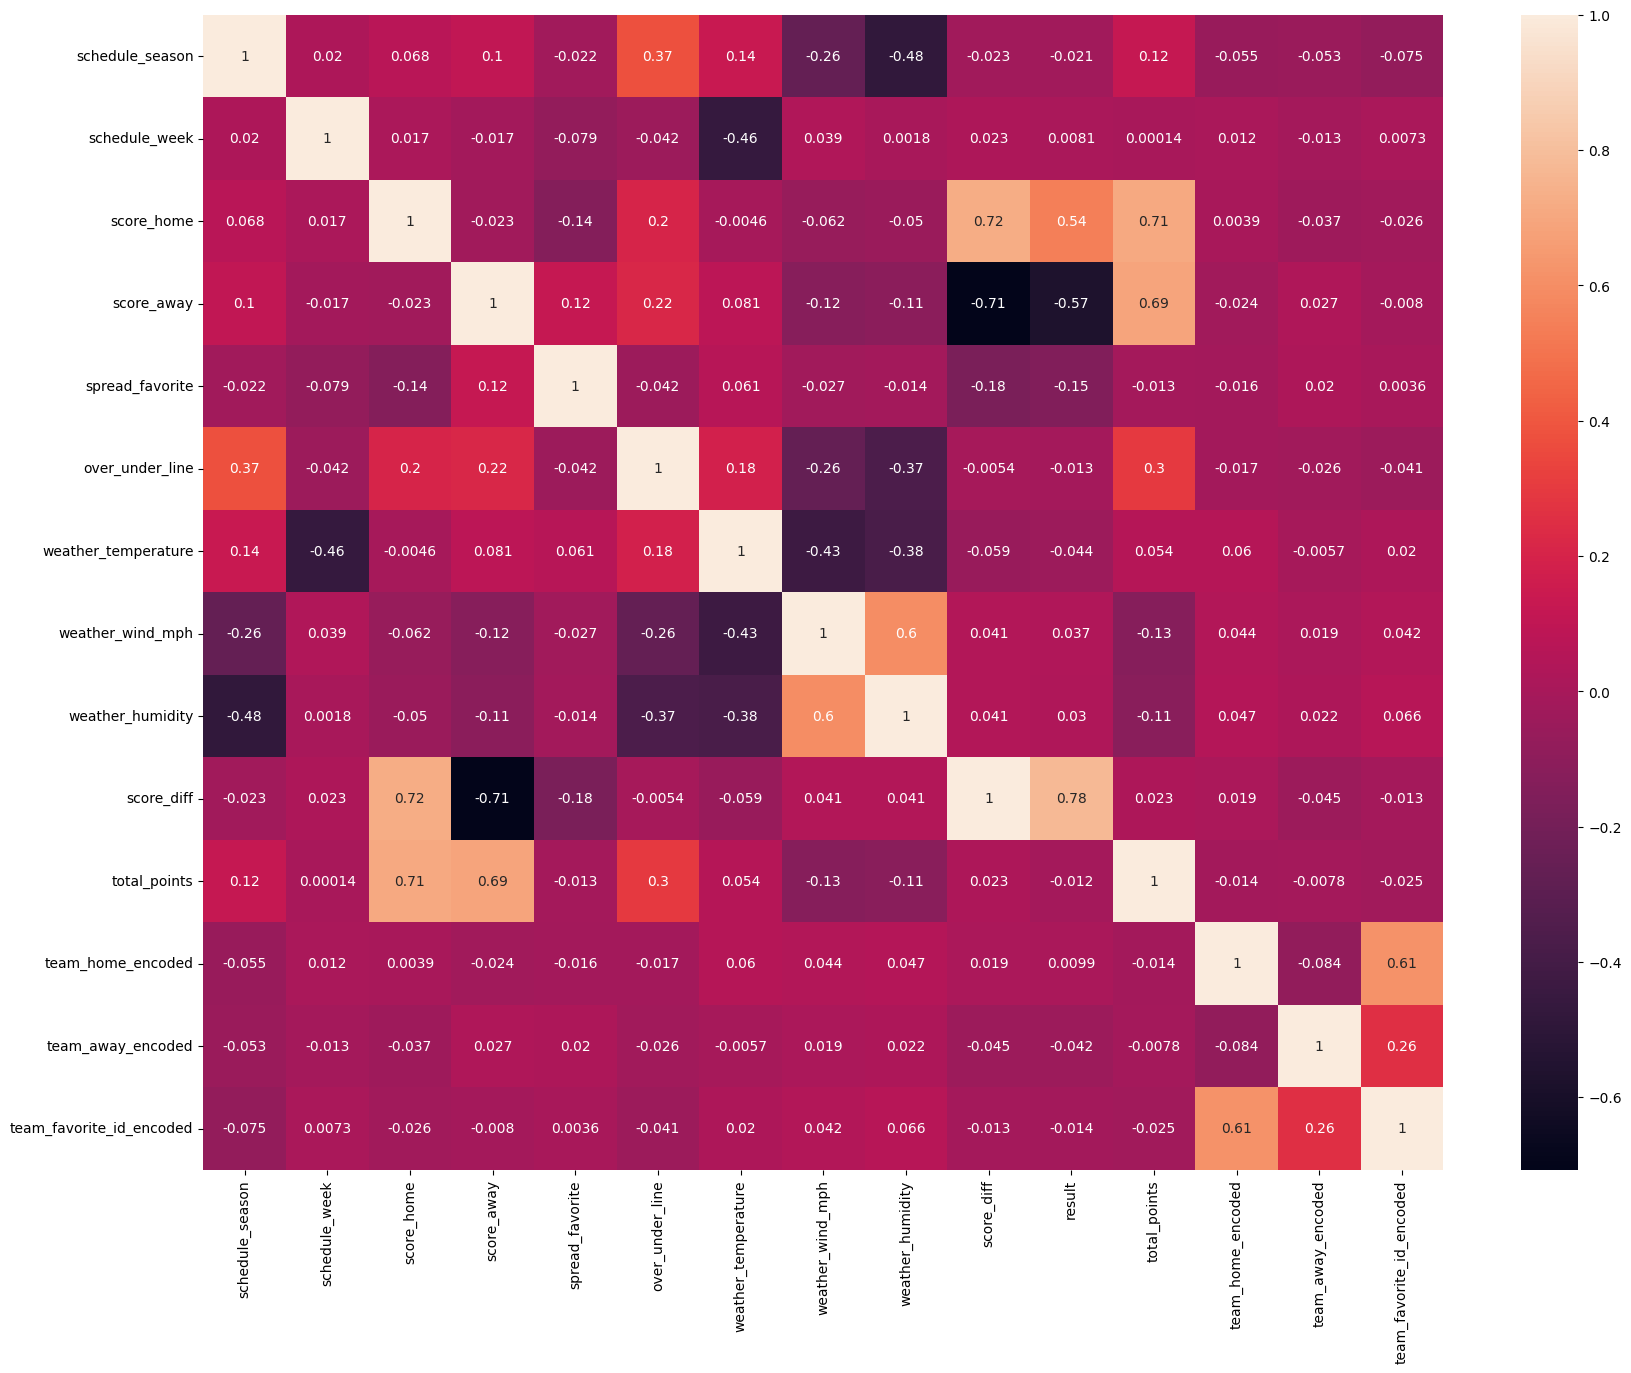

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(scores.corr().drop(["result"]), annot=True);

In [38]:
#Guardamos nuevo dataframe con los datos limpios en CSV

In [39]:
#Observamos un target balancedo
scores['result'].value_counts()/len(scores['result'])*100

1    57.400407
0    42.599593
Name: result, dtype: float64

## 5. Preparacion del modelo

In [40]:
X = scores.drop(["result",
                 "schedule_date",
                 "team_home",
                 "team_away",
                 "team_favorite_id",
                 "stadium",
                 "score_home",
                 "score_away",
                 "score_diff",
                 "schedule_season",
                 "schedule_week",
                 ],
                axis=1
)
y = scores['result'].copy()
X.shape

(10317, 9)

In [41]:
X

,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,weather_humidity,total_points,team_home_encoded,team_away_encoded,team_favorite_id_encoded
0,-3.0,35.0,64.0,8.0,66.0,24,3,19,19
1,-1.0,34.0,72.0,9.0,81.0,29,6,29,29
2,-6.0,35.0,65.0,5.0,77.0,18,11,5,5
3,-3.0,42.0,82.0,10.0,58.0,41,15,18,15
4,-9.0,38.0,66.0,11.0,70.0,61,17,10,17
...,...,...,...,...,...,...,...,...,...
10312,-17.0,43.0,64.0,7.0,0.0,38,25,23,25
10313,-2.5,40.0,64.0,7.0,0.0,42,26,7,26
10314,-14.5,40.0,64.0,7.0,0.0,51,28,0,28
10315,-4.5,43.0,64.0,7.0,0.0,35,27,17,27


In [35]:
scaler = StandardScaler()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [37]:
scaler_X_train = scaler.fit_transform(X_train)

In [38]:
scaler_X_test = scaler.transform(X_test)

## 6. Modelos de clasificación y evaluación:

#### 6.1 Logistic Regression

In [39]:
log_model = LogisticRegression()

In [40]:
log_model.fit(scaler_X_train,y_train)

LogisticRegression()

In [41]:
pred_lg = log_model.predict(scaler_X_test)

In [42]:
print("ROC:",roc_auc_score(y_test, pred_lg)*100)
print("Accuracy:",accuracy_score(y_test, pred_lg)*100)
print("Precision:",precision_score(y_test, pred_lg)*100)
print("F1 Score:",f1_score(y_test, pred_lg)*100)
print("Recall:",recall_score(y_test, pred_lg)*100)

ROC: 52.987076662096314
Accuracy: 57.80038759689923
Precision: 59.06976744186046
F1 Score: 69.99655528763348
Recall: 85.88334742180896


#### 6.2 Decision Tree Classifier

In [43]:
dt = DecisionTreeClassifier()

In [44]:
dt.fit(scaler_X_train,y_train)

DecisionTreeClassifier()

In [45]:
pred_dt = dt.predict(scaler_X_test)

In [46]:
print("ROC:",roc_auc_score(y_test, pred_dt)*100)
print("Accuracy:",accuracy_score(y_test, pred_dt)*100)
print("Precision:",precision_score(y_test, pred_dt)*100)
print("F1 Score:",f1_score(y_test, pred_dt)*100)
print("Recall:",recall_score(y_test, pred_dt)*100)

ROC: 54.959591181541754
Accuracy: 55.9593023255814
Precision: 61.531986531986526
F1 Score: 61.661746098692525
Recall: 61.79205409974641


#### 6.3 Random Forest

In [47]:
r_forest = RandomForestClassifier()

In [48]:
r_forest.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
pred_r_forest = r_forest.predict(X_test)

In [50]:
print("ROC:",roc_auc_score(y_test, pred_r_forest)*100)
print("Accuracy:",accuracy_score(y_test, pred_r_forest)*100)
print("Precision:",precision_score(y_test, pred_r_forest)*100)
print("F1 Score:",f1_score(y_test, pred_r_forest)*100)
print("Recall:",recall_score(y_test, pred_r_forest)*100)

ROC: 58.071641097922424
Accuracy: 60.17441860465116
Precision: 63.340724316334075
F1 Score: 67.58675078864354
Recall: 72.4429416737109


#### 6.4 KNN

In [51]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(scaler_X_train,y_train)

KNeighborsClassifier()

In [53]:
pred_knn = knn.predict(scaler_X_test)

In [54]:
print("ROC:",roc_auc_score(y_test, pred_knn)*100)
print("Accuracy:",accuracy_score(y_test, pred_knn)*100)
print("Precision:",precision_score(y_test, pred_knn)*100)
print("F1 Score:",f1_score(y_test, pred_knn)*100)
print("Recall:",recall_score(y_test, pred_knn)*100)

ROC: 56.342356674147474
Accuracy: 58.04263565891473
Precision: 62.27730441518203
F1 Score: 64.99595796281325
Recall: 67.96280642434489


#### 6.5 SVM

In [55]:
svm = SVC()

In [56]:
svm.fit(scaler_X_train,y_train)

SVC()

In [57]:
pred_svm = svm.predict(scaler_X_test)

In [58]:
print("ROC:",roc_auc_score(y_test, pred_svm)*100)
print("Accuracy:",accuracy_score(y_test, pred_svm)*100)
print("Precision:",precision_score(y_test, pred_svm)*100)
print("F1 Score:",f1_score(y_test, pred_svm)*100)
print("Recall:",recall_score(y_test, pred_svm)*100)

ROC: 56.14839626452305
Accuracy: 60.610465116279066
Precision: 61.011904761904766
F1 Score: 71.60321341250437
Recall: 86.64412510566358


#### 6.6 GaussianNB

In [59]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [60]:
gnb.fit(X_train, y_train)

GaussianNB()

In [61]:
pred_gnb = gnb.predict(X_test)

In [ ]:
print("ROC:",roc_auc_score(y_test, pred_gnb)*100)
print("Accuracy:",accuracy_score(y_test, pred_gnb)*100)
print("Precision:",precision_score(y_test, pred_gnb)*100)
print("F1 Score:",f1_score(y_test, pred_gnb)*100)
print("Recall:",recall_score(y_test, pred_gnb)*100)

In [ ]:
model = XGBClassifier()

# Define los valores que deseas probar para cada hiperparámetro en un diccionario
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

# Realiza la búsqueda en cuadrícula utilizando validación cruzada para encontrar la combinación óptima de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="precision", cv=5)
grid_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Haz predicciones en los datos de prueba utilizando el modelo con los mejores hiperparámetros
predictions = grid_search.best_estimator_.predict(X_test)


In [ ]:
print("ROC:",roc_auc_score(y_test, predictions)*100)
print("Accuracy:",accuracy_score(y_test, predictions)*100)
print("Precision:",precision_score(y_test, predictions)*100)
print("F1 Score:",f1_score(y_test, predictions)*100)
print("Recall:",recall_score(y_test, predictions)*100)

#### 6.7 XGBoost

In [62]:
import xgboost as xgb
xgb = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, subsample=0.8, colsample_bytree= 0.9, gamma=5)

In [63]:
xgb.fit(X_train, y_train)

[23:13:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "subsample_freq" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [64]:
pred_xgb = xgb.predict(X_test)

In [65]:
print("ROC:",roc_auc_score(y_test, pred_xgb)*100)
print("Accuracy:",accuracy_score(y_test, pred_xgb)*100)
print("Precision:",precision_score(y_test, pred_xgb)*100)
print("F1 Score:",f1_score(y_test, pred_xgb)*100)
print("Recall:",recall_score(y_test, pred_xgb)*100)

ROC: 58.66474833121127
Accuracy: 61.96705426356589
Precision: 63.057742782152225
F1 Score: 71.00110823790173
Recall: 81.2341504649197


#### 6.8 CatBoost

In [ ]:
cat = AdaBoostClassifier()

In [ ]:
cat.fit(X_train, y_train)

In [ ]:
pred_cat = cat.predict(X_test)

In [ ]:
print("ROC:",roc_auc_score(y_test, pred_cat)*100)
print("Accuracy:",accuracy_score(y_test, pred_cat)*100)
print("Precision:",precision_score(y_test, pred_cat)*100)
print("F1 Score:",f1_score(y_test, pred_cat)*100)
print("Recall:",recall_score(y_test, pred_cat)*100)

#### 6.9 Gradient Boosting

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train, y_train)

In [ ]:
pred_gbc = gbc.predict(X_test)

In [ ]:
print("ROC:",roc_auc_score(y_test, pred_gbc)*100)
print("Accuracy:",accuracy_score(y_test, pred_gbc)*100)
print("Precision:",precision_score(y_test, pred_gbc)*100)
print("F1 Score:",f1_score(y_test, pred_gbc)*100)
print("Recall:",recall_score(y_test, pred_gbc)*100)

In [ ]:
bg = BaggingClassifier()
bg.fit(X_train, y_train)
pred_bg = bg.predict(X_test)


print("ROC:",roc_auc_score(y_test, pred_bg)*100)
print("Accuracy:",accuracy_score(y_test, pred_bg)*100)
print("Precision:",precision_score(y_test, pred_bg)*100)
print("F1 Score:",f1_score(y_test, pred_bg)*100)
print("Recall:",recall_score(y_test, pred_bg)*100)

### 7. SELECTION MODELS